# LOGISTIC REGRESSION

Logistic regression is a statistical algorithm used for binary classification tasks, where the goal is to predict a binary outcome (e.g., yes/no, true/false, 0/1) based on a set of input variables or features. It is a supervised learning algorithm that is widely used in various fields, including machine learning, statistics, and social sciences.

The main difference between logistic regression and linear regression lies in the nature of the dependent variable. In linear regression, the dependent variable is continuous, meaning it can take any value within a range. In logistic regression, the dependent variable is categorical and binary, meaning it can only take two discrete values.

To understand the difference, let's consider an example where we want to predict whether a student will pass or fail an exam based on the number of hours they studied. In linear regression, we could use the number of hours studied as the independent variable and predict the student's exam score, which is a continuous value. In logistic regression, we would instead predict whether the student will pass or fail, which is a binary value.  

The formula used in logistic regression is based on the logistic function (also called the sigmoid function), which maps any real-valued number to a value between 0 and 1. The logistic function is defined as:

P(y=1|X) = 1 / (1 + e^(-z))

where:

P(y=1|X) represents the probability of the dependent variable (y) being 1 (success) given the input variables (X).  
z is the linear combination of the input variables and their corresponding coefficients, also known as the log-odds or logit, and is given by:  
z = β0 + β1X1 + β2X2 + ... + βn*Xn  

In this equation, β0, β1, β2, ..., βn are the coefficients or weights associated with each input variable (X1, X2, ..., Xn), which are estimated during the model training process.

During training, logistic regression aims to find the optimal set of coefficients that maximizes the likelihood of observing the given set of outcomes. This is typically done using optimization algorithms such as maximum likelihood estimation or gradient descent.

Once the coefficients are determined, the logistic regression model can be used to predict the probability of the binary outcome (e.g., the probability of passing the exam). By setting a threshold (e.g., 0.5), we can classify the predicted probabilities into their respective binary classes (e.g., pass or fail).

Overall, logistic regression is a powerful and widely used algorithm for binary classification tasks, allowing us to understand the relationship between input variables and the probability of a binary outcome.

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [10]:
data = pd.read_csv(r"C:/Users/HP/OneDrive/Documents/Post_Grad/Semester_2/Machine_Learning/Data/heartDisease.csv")

In [11]:
data.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [13]:
data.shape 

(4238, 16)

In [12]:
data.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [16]:
# check for column that is not discrete to scale data

#all-columns list
df_all_colum=list(data.columns)

# discrete/categorical column list
discrete_cols=list(data.columns[data.round(decimals=0).isin([0,1]).all()])
discrete_cols.append('education')
discrete_cols.append('BPMeds')

#continuous column list
continuous_cols=list()
for i in df_all_colum:
    if i not in discrete_cols:
        if i not in['education', 'BPMeds']:
            continuous_cols.append(i)

In [17]:
#check if the two list are correct
print('Discrete cols: ', discrete_cols), print('Continuous cols:', continuous_cols)

Discrete cols:  ['male', 'currentSmoker', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'TenYearCHD', 'education', 'BPMeds']
Continuous cols: ['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']


(None, None)

In [19]:
from sklearn.preprocessing import MinMaxScaler 
scaler = MinMaxScaler()

#scale continuous columns data
array_scaled = scaler.fit_transform(data[continuous_cols])

#turn array scaled to dataframe 
df_scaled_cols = pd.DataFrame(array_scaled, columns = [data[continuous_cols]])

#create a complete scaled data
df_scaled = data[df_all_colum]
df_scaled[continuous_cols] = df_scaled_cols[continuous_cols]

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'cigsPerDay'}>,
        <AxesSubplot:title={'center':'totChol'}>,
        <AxesSubplot:title={'center':'sysBP'}>],
       [<AxesSubplot:title={'center':'diaBP'}>,
        <AxesSubplot:title={'center':'BMI'}>,
        <AxesSubplot:title={'center':'heartRate'}>,
        <AxesSubplot:title={'center':'glucose'}>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:

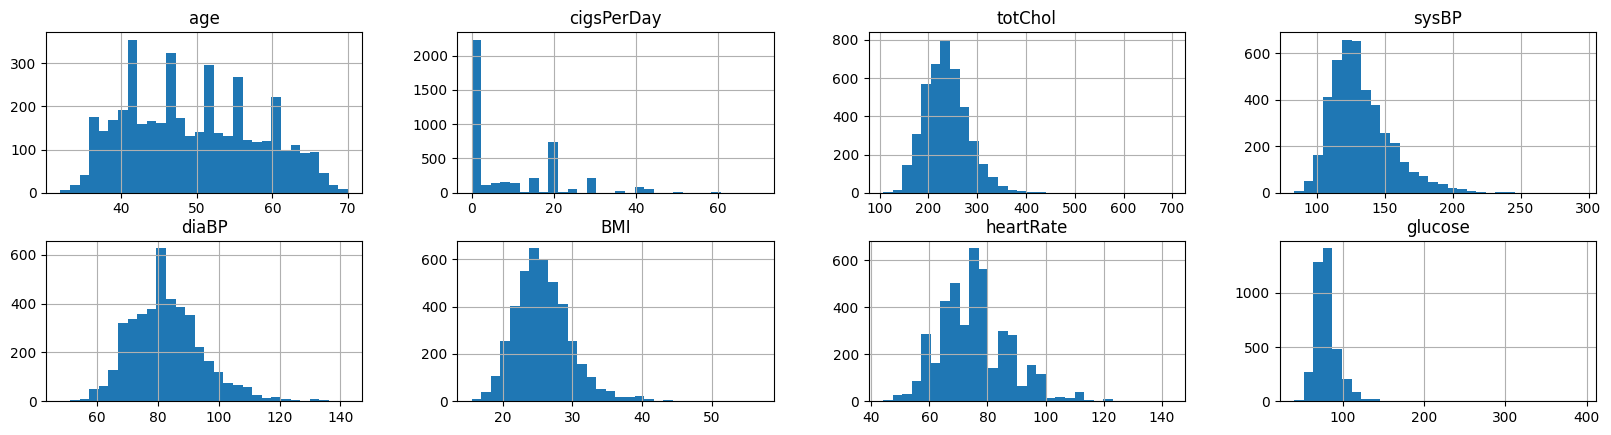

In [20]:
#datafram before scaling
data[continuous_cols].hist(bins=30, 
        figsize=(20,40),
        layout=(15,4))

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'cigsPerDay'}>,
        <AxesSubplot:title={'center':'totChol'}>,
        <AxesSubplot:title={'center':'sysBP'}>],
       [<AxesSubplot:title={'center':'diaBP'}>,
        <AxesSubplot:title={'center':'BMI'}>,
        <AxesSubplot:title={'center':'heartRate'}>,
        <AxesSubplot:title={'center':'glucose'}>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:

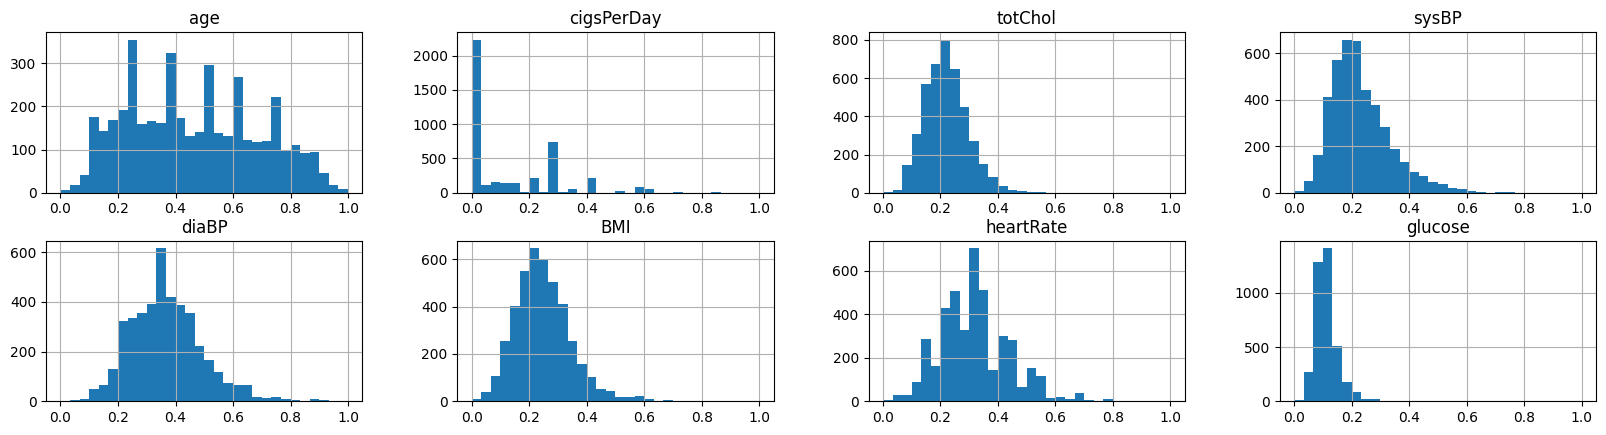

In [21]:
#datafram after scaling
df_scaled[continuous_cols].hist(bins=30, 
        figsize=(20,40),
        layout=(15,4))

In [22]:
#Handling duplicate data
df_scaled.drop_duplicates()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,0.184211,4.0,0,0.000000,0.0,0,0,0,0.149406,0.106383,0.232804,0.277024,0.363636,0.104520,0
1,0,0.368421,2.0,0,0.000000,0.0,0,0,0,0.242784,0.177305,0.349206,0.319680,0.515152,0.101695,0
2,1,0.421053,1.0,1,0.285714,0.0,0,0,0,0.234295,0.208038,0.338624,0.237518,0.313131,0.084746,0
3,0,0.763158,3.0,1,0.428571,0.0,0,1,0,0.200340,0.314421,0.497354,0.316045,0.212121,0.177966,1
4,0,0.368421,3.0,1,0.328571,0.0,0,0,0,0.302207,0.219858,0.380952,0.183228,0.414141,0.127119,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,0.473684,1.0,1,0.014286,0.0,0,1,0,0.349745,0.451537,0.465608,0.252787,0.222222,0.129944,1
4234,1,0.500000,3.0,1,0.614286,0.0,0,0,0,0.169779,0.203310,0.338624,0.101066,0.212121,0.079096,0
4235,0,0.421053,2.0,1,0.285714,NaN,0,0,0,0.239389,0.224586,0.253968,0.156568,0.404040,0.129944,0
4236,0,0.315789,1.0,1,0.214286,0.0,0,0,0,0.174873,0.203310,0.412698,0.087736,0.424242,NaN,0


In [23]:
#Handling missing data
#check if there are any null value in dataset 
df_scaled.isnull().sum() 
df_scaled.isnull().sum().sum()

645

In [25]:
#As we confirm that our missing value is MCAR, we will use iterative imputing to fill in NA value
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

#iterative imputer module, impute on the scaled dataset
imputer = IterativeImputer()
df_impute = imputer.fit_transform(df_scaled)

#impute dataframe 
df_impute = pd.DataFrame(data=df_impute, columns=data.columns)

In [26]:
#after imputing, sometime data isn't rounded correctly
#BPMeds  
df_impute['BPMeds'] = df_impute['BPMeds'].round(decimals=0) 
df_impute['BPMeds'].value_counts()
#education  
df_impute['education'] = df_impute['education'].round(decimals=0) 
df_impute['education'].value_counts()

1.0    1724
2.0    1354
3.0     687
4.0     473
Name: education, dtype: int64

In [27]:
# Handling ouliers
from sklearn.model_selection import train_test_split

#Separate label (y) and predictor (X)
X = df_impute.drop('TenYearCHD', axis=1)
y = df_impute['TenYearCHD']

#Split the data set for winsorization (onliy winsorize on the train set and NOT on the test set)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

#check 
print('X_train:',X_train.shape,', X_test:', X_test.shape)

X_train: (3390, 15) , X_test: (848, 15)


([<matplotlib.axis.XTick at 0x227e27a7700>,
 [Text(1, 0, 'age'),
  Text(2, 0, 'cigsPerDay'),
  Text(3, 0, 'totChol'),
  Text(4, 0, 'sysBP'),
  Text(5, 0, 'diaBP'),
  Text(6, 0, 'BMI'),
  Text(7, 0, 'heartRate'),
  Text(8, 0, 'glucose')])

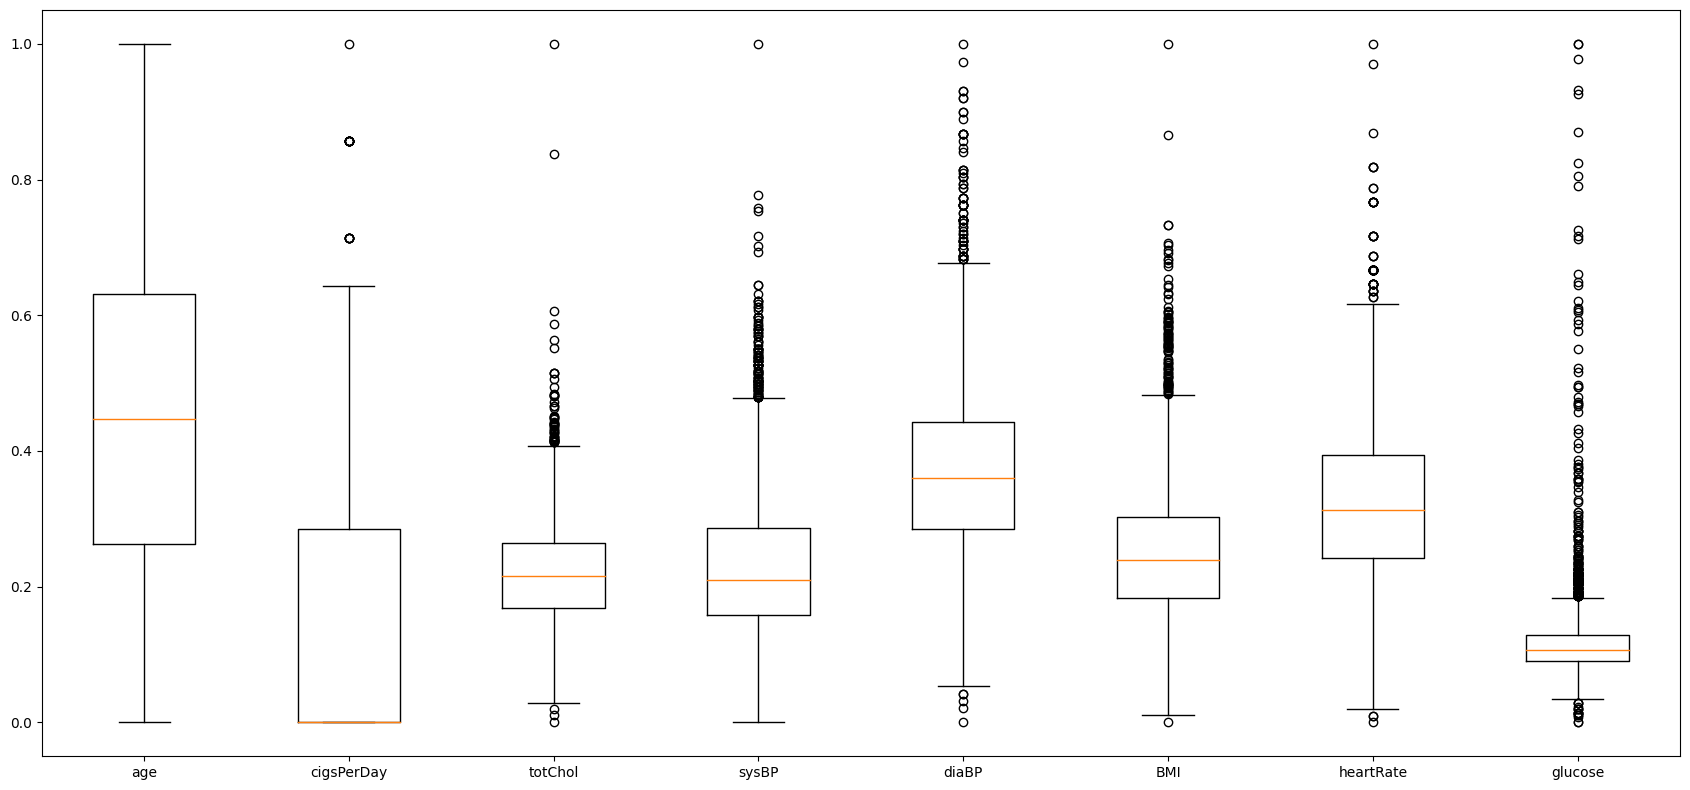

In [29]:
#visualize outlier (before winsorization)
plt.rcParams["figure.figsize"] = [17, 8]
plt.rcParams["figure.autolayout"] = True
plt.boxplot(x=df_impute[continuous_cols])
plt.xticks(ticks=range(1,9), labels=np.array(continuous_cols))

In [33]:
pip install -U imbalanced-learn

Defaulting to user installation because normal site-packages is not writeable
     ------------------------------------ 226.0/226.0 kB 811.1 kB/s eta 0:00:00
     ------------------------------------ 298.0/298.0 kB 400.2 kB/s eta 0:00:00
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
      Successfully uninstalled joblib-1.1.0
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [34]:
#SMOTE-tomek (SMOTE-Tomek is a combination of oversampling (SMOTE) and undersampling (Tomek links) techniques)
from imblearn.combine import SMOTETomek

#Create the SMOTE-tomek variable 
smote_tomek = SMOTETomek(random_state=42)

#Applie SMOTE-tomek to train data
X_train_resampled, y_train_resampled = smote_tomek.fit_resample(X_train, y_train)

In [35]:
#Original train dataset 
X_train.count(), y_train.value_counts()

(male               3390
 age                3390
 education          3390
 currentSmoker      3390
 cigsPerDay         3390
 BPMeds             3390
 prevalentStroke    3390
 prevalentHyp       3390
 diabetes           3390
 totChol            3390
 sysBP              3390
 diaBP              3390
 BMI                3390
 heartRate          3390
 glucose            3390
 dtype: int64,
 0.0    2875
 1.0     515
 Name: TenYearCHD, dtype: int64)

<AxesSubplot:>

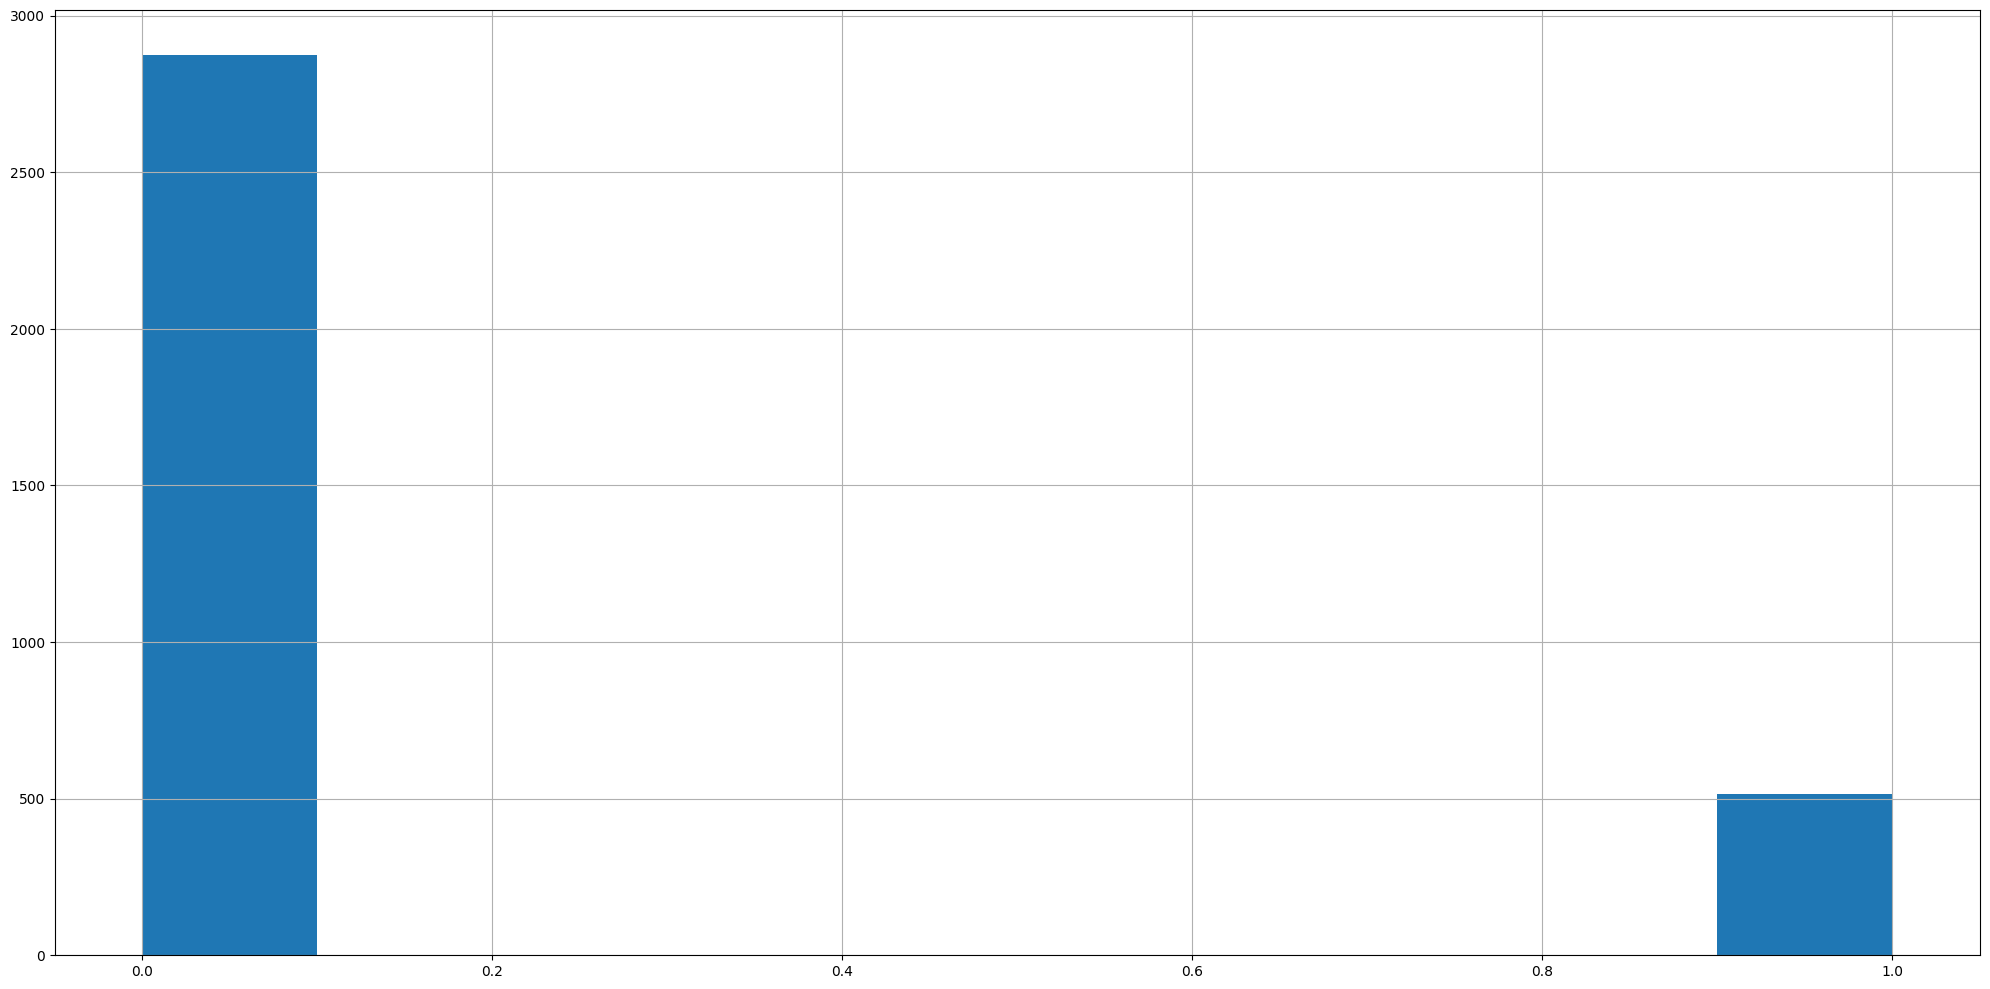

In [36]:
#visualize original imbalanced data
y_train.hist(figsize=(20,10))

In [37]:
#my feature list
feature_list = list(X_train_resampled.columns)
feature_list.remove('education') 
feature_list.remove('currentSmoker')
feature_list.remove('glucose')

feature_list

['male',
 'age',
 'cigsPerDay',
 'BPMeds',
 'prevalentStroke',
 'prevalentHyp',
 'diabetes',
 'totChol',
 'sysBP',
 'diaBP',
 'BMI',
 'heartRate']

In [38]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

#class weighting (more weight on minority class - class 1)
class_weight = {0: 1, 1: 1.2}

#create LogisticRegression model
lr = LogisticRegression(max_iter=1000, solver='liblinear', class_weight=class_weight)

#define tunning parameter
hyperparameters = {'C':[0.001, 0.01, 0.1, 1, 10, 100, 1000], 'penalty': ['l1','l2']}

#create GridSearchCV model
grid_search = GridSearchCV(lr,hyperparameters, cv=5, scoring='roc_auc')

#fit data into grid_search
grid_search.fit(X_train_resampled[feature_list] , y_train_resampled),

#print best hyperparameters results and model score 
print(grid_search.best_params_, grid_search.best_score_)

#predict
y_proba = grid_search.predict_proba(X_test[feature_list])[:,1]

# Threshold value can be adjusted to prioritize certain types of errors over others.
# ex: customize threshold to increase sensitivity  to patience with the disease (reduce false negative)
y_pred = (y_proba>0.5).astype(int)

{'C': 10, 'penalty': 'l1'} 0.7383157744121882


In [39]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, classification_report, auc

In [40]:
#classification report (#Precision & Recall & F1 score)
c=classification_report(y_test, y_pred, output_dict=True)
pd.DataFrame(c)

,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.915433,0.237333,0.615566,0.576383,0.812279
recall,0.602225,0.689922,0.615566,0.646074,0.615566
f1-score,0.726510,0.353175,0.615566,0.539842,0.669717
support,719.000000,129.000000,0.615566,848.000000,848.000000


array([[<AxesSubplot:title={'center':'male'}>,
        <AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'education'}>,
        <AxesSubplot:title={'center':'currentSmoker'}>],
       [<AxesSubplot:title={'center':'cigsPerDay'}>,
        <AxesSubplot:title={'center':'BPMeds'}>,
        <AxesSubplot:title={'center':'prevalentStroke'}>,
        <AxesSubplot:title={'center':'prevalentHyp'}>],
       [<AxesSubplot:title={'center':'diabetes'}>,
        <AxesSubplot:title={'center':'totChol'}>,
        <AxesSubplot:title={'center':'sysBP'}>,
        <AxesSubplot:title={'center':'diaBP'}>],
       [<AxesSubplot:title={'center':'BMI'}>,
        <AxesSubplot:title={'center':'heartRate'}>,
        <AxesSubplot:title={'center':'glucose'}>,
        <AxesSubplot:title={'center':'TenYearCHD'}>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot

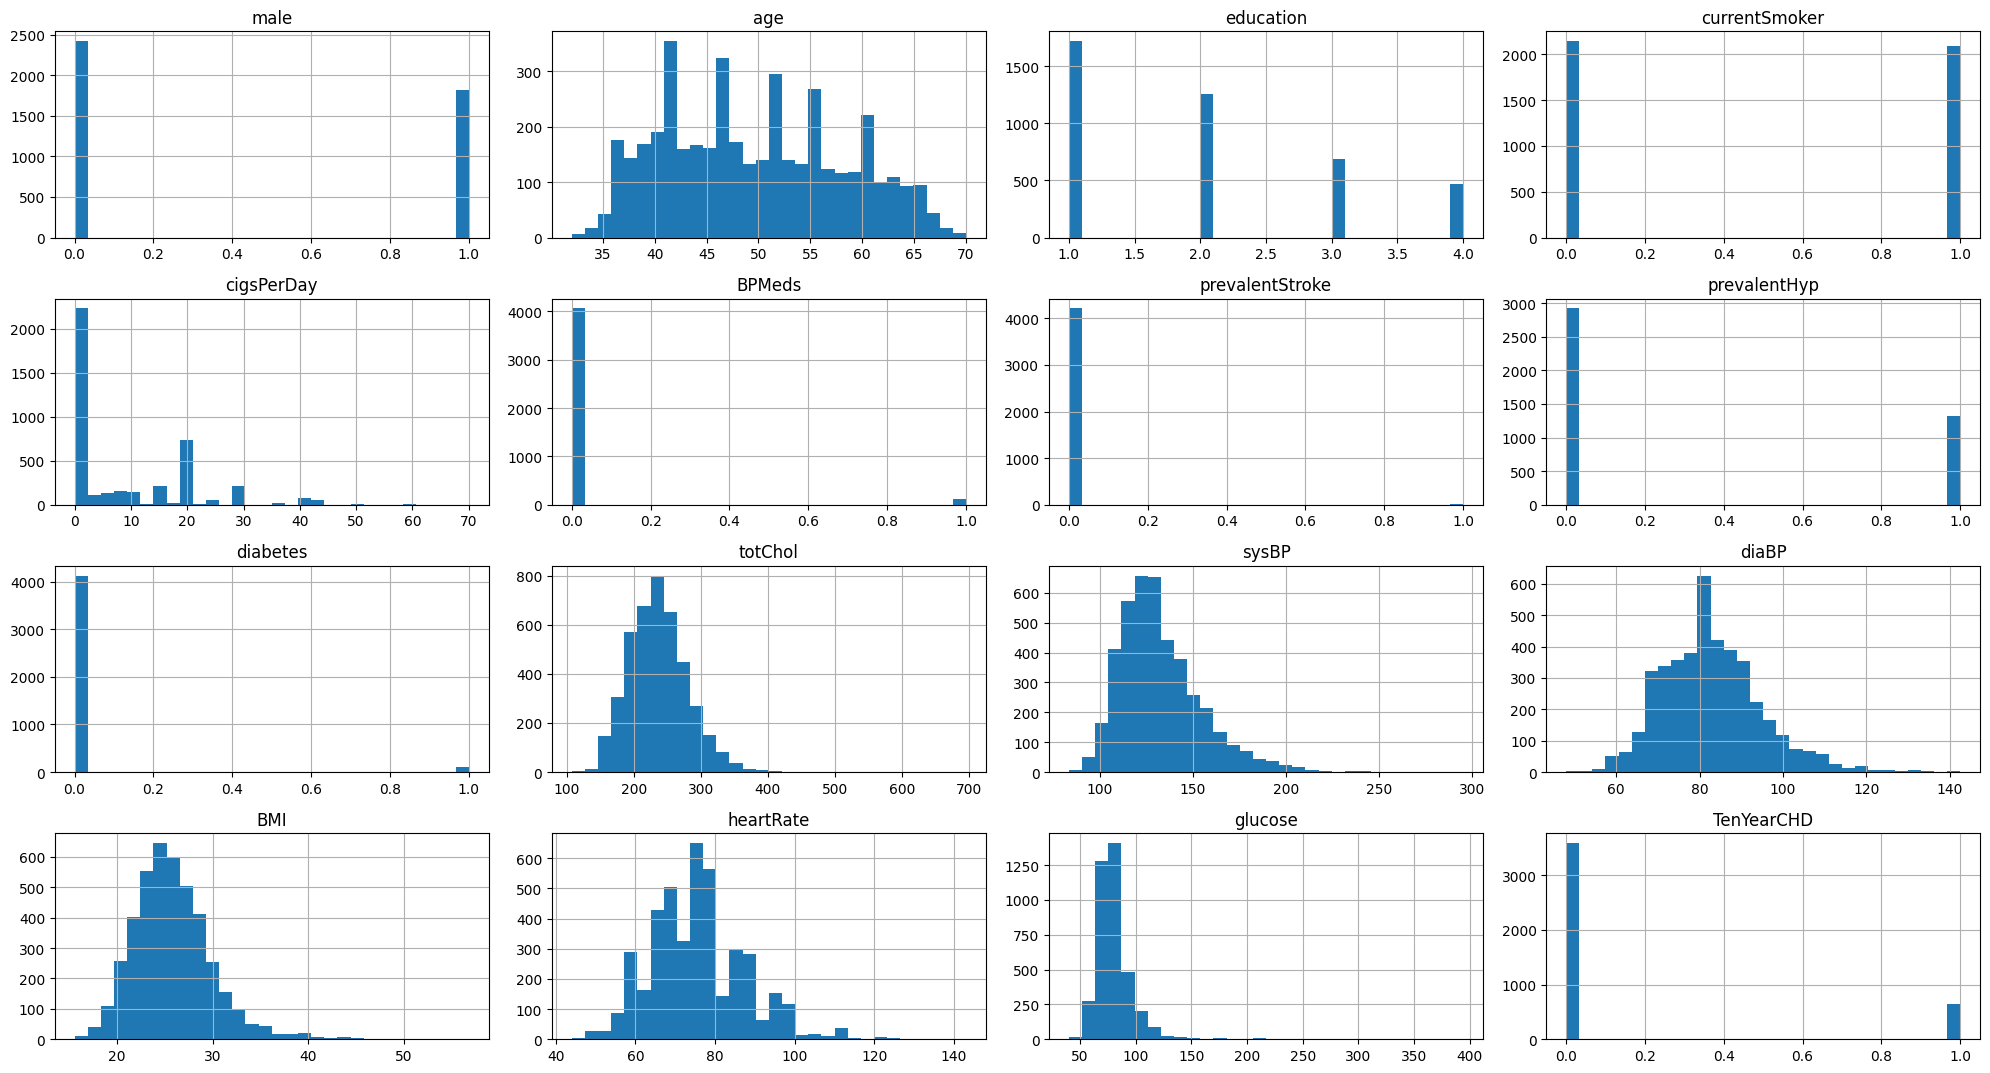

In [41]:
data.hist(bins=30, 
        figsize=(20,40),
        layout=(15,4))